# Quest04: 고양이 수염을 얼굴에 붙여보자!

In [1]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리
import math # 기울기 계산을 위한 라이브러리

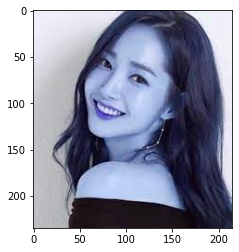

In [2]:
# my_image_path = 'images/my_face.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
# img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
tilt_face_path = 'images/tilt_face.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(tilt_face_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

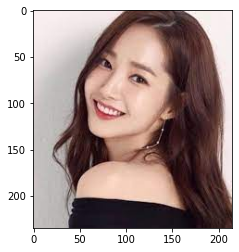

In [3]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [4]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

In [5]:
# 오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

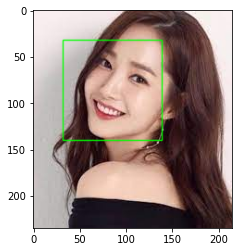

In [6]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다 
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 1, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [7]:
model_path = '/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
print(model_path)
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

/aiffel/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat


In [8]:
def find_landmarks():   
    list_landmarks = []
        # 랜드마크의 위치를 저장할 list 생성    

    # 얼굴 영역 박스 마다 face landmark를 찾아냅니다
    # face landmark 좌표를 저장해둡니다
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
            # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
            # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
            # list_landmarks에 랜드마크 리스트를 저장

        # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
        # 각 원소는 68개의 랜드마크 위치가 나열된 list 
        # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생
    return list_landmarks

In [9]:
# 고양이 수염이 적용 될 위치를 landmark를 사용해서 계산해 주세요.
list_landmarks = find_landmarks()
print(find_landmarks())

[[(68, 56), (62, 65), (57, 74), (55, 84), (56, 93), (58, 104), (59, 114), (60, 126), (65, 134), (75, 138), (89, 138), (103, 135), (118, 132), (130, 125), (138, 114), (145, 103), (151, 90), (73, 41), (77, 39), (82, 41), (87, 45), (90, 50), (102, 55), (112, 56), (121, 59), (129, 65), (134, 71), (91, 65), (87, 73), (82, 80), (77, 87), (71, 89), (74, 92), (77, 96), (82, 97), (88, 98), (73, 56), (77, 54), (82, 57), (84, 64), (80, 61), (75, 59), (104, 73), (111, 71), (116, 73), (121, 79), (115, 78), (109, 76), (65, 96), (68, 96), (73, 97), (76, 100), (82, 102), (91, 107), (101, 113), (87, 118), (77, 117), (71, 115), (67, 112), (65, 105), (67, 98), (71, 100), (75, 103), (80, 105), (98, 112), (79, 113), (74, 111), (70, 107)]]


In [10]:
def show_landmark_image():    
    # list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1)
                # cv2.circle: OpenCV의 원을 그리는 함수
                # img_show 이미지 위 각각의 point에
                # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
                # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
        # RGB 이미지로 전환
    plt.imshow(img_show_rgb)
        # 이미지를 준비
    plt.show()
        # 이미지를 출력

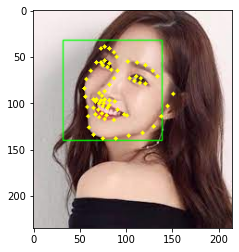

In [11]:
show_landmark_image() # landmark 적용 이미지 출력

In [12]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

In [13]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + int(round(dlib_rect.height() * 0.25,0)) # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = round(dlib_rect.width()/2) # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(77, 87)
(x,y) : (77,114)
(w,h) : (54,54)


In [14]:
sticker_path = 'images/cat-whiskers.png' # 고양이 수염 이미지의 경로

img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환

img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 고양이 수염 이미지의 차원 확인

(54, 54, 3)


In [15]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

(x,y) : (50,60)


In [16]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 고양이 수염 이미지를 씌우기 위해 고양이 수염 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (50,60)


In [17]:
# (1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)

print(img_show.shape)

(235, 215, 3)


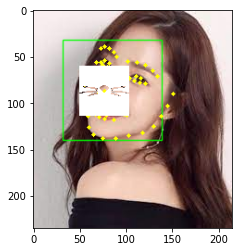

In [18]:
# 고양이 수염 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 고양이 수염 이미지를 덧붙인 이미지가 나오게 된다.) -> 그냥 이미지가 올라가 있음
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

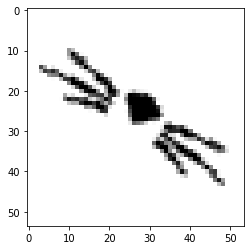

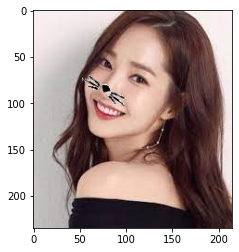

In [21]:
# (2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요?
# 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다. opencv 의 cv2.addWeighted() 를 참고하세요.

img_show2 = img_bgr.copy()      # 출력용 자연스럽게용
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
# img_show2 사용해서 테스트
sticker_area = img_show2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

'''
이 방법은 이미지 조건값 설정
# B, G, R = cv2.split(img_sticker)

# not_black = np.any([B > 0, G > 0, R > 0], axis=0)

# not_white = np.any([B == 255, G == 255, R == 255], axis=0)

# condition = np.logical_and(not_black, not_white)
# # 'condition' 배열을 3차원으로 확장
# condition_3d = np.stack((condition, condition, condition), axis=-1)
'''

# 기울기 값 계산
tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi

img_sticker_rot = cv2.getRotationMatrix2D((int(img_sticker.shape[0]/2), int(img_sticker.shape[1]/2)), rotate_angle,1)
result = cv2.warpAffine(img_sticker, img_sticker_rot, (54, 54),flags=cv2.INTER_LINEAR,borderValue=(255,255,255)) #flags 이 옵션을 넣지 않을 경우 배경색이 검은색으로 남아있음.

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

img_show2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(result==255,sticker_area,result).astype(np.uint8) # 여기서 255는 왕관 사진과 수염 사진은 반대이기 때문에 255로 변경

# img_show2[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
#     cv2.addWeighted(sticker_area, 1, img_sticker, 0.8, 0.0)

plt.imshow(cv2.cvtColor(img_show2, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
# # 이미지 변경 3번 째 방법 주석처리

# # 이미지 읽기
# img_show3 = img_bgr.copy()  # 출력용

# # 스티커 정보
# img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)
# img_sticker = cv2.resize(img_sticker, (w,h))

# # 스티커 영역 추출
# sticker_area = img_show3[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]]

# # 알파 채널을 이용하여 투명도 마스크 생성
# alpha_mask = img_sticker[:, :, 3] / 255.0

# # 스티커의 배경을 투명하게 만들기
# if img_sticker.shape[2] == 4:
#     alpha_channel = img_sticker[:, :, 3] / 255.0  # 알파 채널을 [0, 1] 범위로 정규화
#     img_sticker = img_sticker[:, :, :3] * alpha_channel[:, :, np.newaxis]  # RGB 채널에 알파 채널을 적용
    
# # 스티커 영역을 투명도 마스크를 이용하여 원래 이미지에 합성
# img_show3[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] = \
#     img_show3[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x + img_sticker.shape[1]] * \
#     (1 - alpha_mask[:, :, np.newaxis]) + img_sticker * alpha_mask[:, :, np.newaxis]

# plt.imshow(cv2.cvtColor(img_show3, cv2.COLOR_BGR2RGB))
# plt.show()


---

## 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석

### 1. 밝기에 따른 영향도 분석

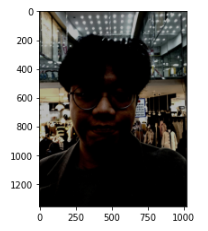

위 이미지처럼 밝기가 너무 어둡다면 아래처럼 얼굴의 영역을 확인하지 못하는 것을 볼 수 있다.

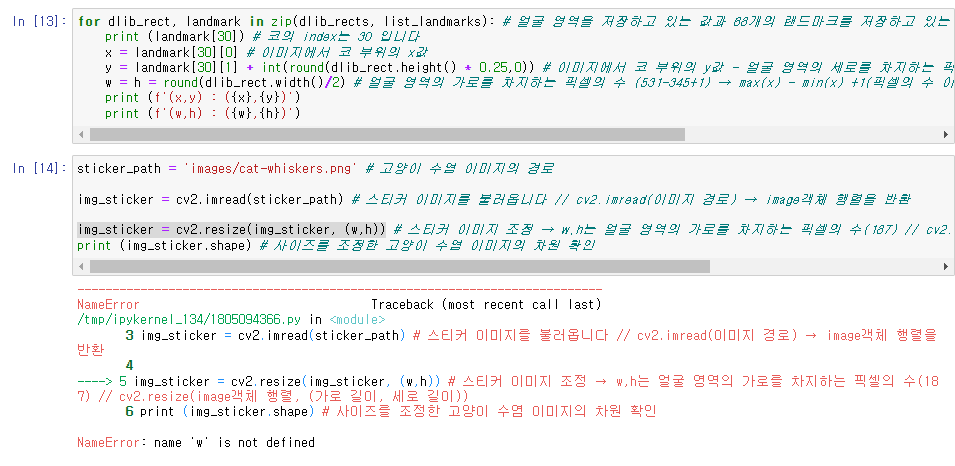

---

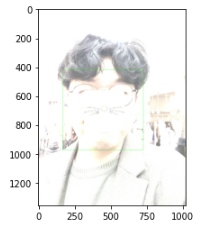

하지만 위의 사진처럼 매우 밝은 사진으로 테스트를 해 본 결과

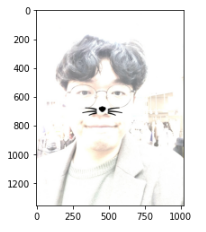

인식이 잘 되고 고양이 수염도 코에 정확하게 붙은 것을 볼 수 있었다.  
하지만 이 경우도 더 밝게하여 얼굴의 경계가 명확하지 않을 경우는 불가능 할 것으로 보인다.

**결론: 밝기의 경우 너무 어둡거나 너무 밝아서 얼굴의 윤곽이 확인되지 않을 경우에는 인식이 되지 않는 것 같다.  
이런 경우로 보아서 자세히 들어가보면 경계 값이 존재할 것으로 보인다.**

### 2. 얼굴 각도에 따른 영향도 분석

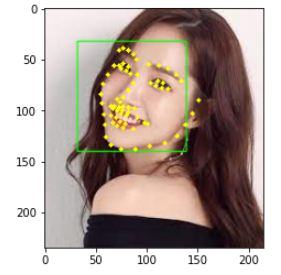

위 사진처럼 얼굴 각도가 기울어져 있을 경우에는 얼굴이 인식된 영역에서 랜드마크 값이 기울어져 있는 것을 볼 수 있다.

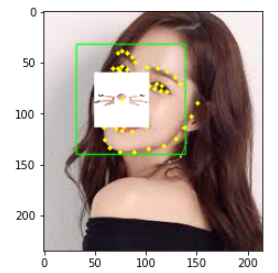

따라서 스티커가 기존과 같은 방법으로 붙는 것 보다는 얼굴의 기울기에 맞게 회전을 시켜주는 작업이 필요하다.

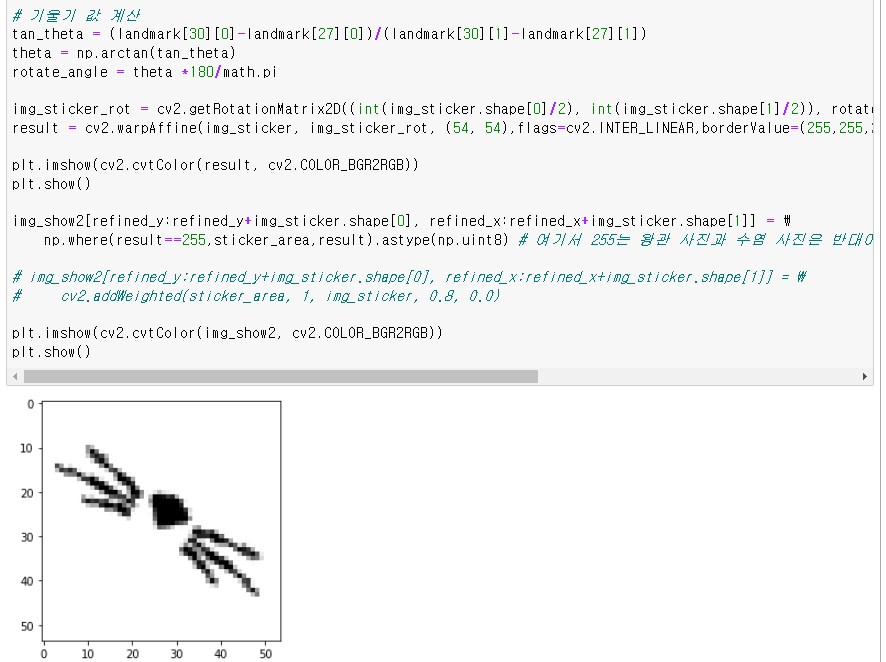

위 사진과 같이 기울기 코의 landmark 27, 30번 값을 사용해서 기울기를 구하고 그 기울기만큼 수염 스티커를 회전 시킨다.

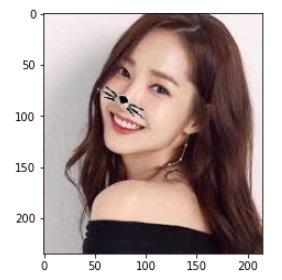

회전된 스티커를 적용할 경우 더 자연스러운 것을 볼 수 있다.

**결론: 옆으로 누웠을 때의 각도가 아닌 갸우뚱 자세에서는 landmark도 그에 맞춰 출력되기 때문에 코나 양쪽 눈의 기울기를 통해서 회전각을 구한 후 스티커 이미지를 회전시켜 적용시키면 될 것 같다.**


---

- **1. 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?**

-> 얼굴 각도에 따라서 스티커는 landmark에 따라서 예를 들어 얼굴의 가운데 부분인 27, 30을 직선으로 그었을 때의 기울기 만큼 스티커도 기울이는 작업이 필요합니다.

- **2. 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?**

-> 멀리서 촬영할 경우 얼굴을 감지의 정확도가 떨어지기 때문으로 보이고, 옆으로 누웠을 경우 각도를 계산하지 못하고 인식하는 등의 이유로 스티커가 원하는 위치에 붙지 않을 수 있기 때문이다.

- **3. 실행 속도가 중요할까요?**

-> 속도가 느릴 경우 실시간으로 처리되는 영상에 적용할 때 반영이 늦어 이상하게 보일 수 있을 것으로 생각된다.  
하지만 보통의 이미지의 경우에는 실행속도가 느리더라도 크게 중요하지 않을 것 같다.

- **4. 스티커앱을 만들 때 정확도가 얼마나 중요할까요?**

-> 정확도도 물론 중요할 것으로 보이나 실행 속도와 반비례하는 결과로 이어질 것 같아서 얼굴의 중요한 포인트만 알 수 있는 정도면 충분할 것 같다.


---

## 회고

카메라 스티커 앱을 사용하기만 해보았는데 이렇게 직접 구형해보고 실험도 해보면서 생각보다 쉬운 것 같으면서도 이해하기 힘든 부분도 많았다..  

특히, 고양이 수염 사진의 경우 수염 부분이 투명하고 배경이 흰색으로 나오는 현상이 있었는데 이 부분을 해결하는데 많은 시간을 쓴 것 같다. -> CV를 하기 위해서는 이미지 자체에 대한 이해도도 많이 필요한 것 같아 공부를 많이 해야할 것 같다...!

그래도 이런 실습은 정말 재미있는 것 같다!